# Data Science Academy / Week 4 Homework
# Titus Teodorescu

Part 1
--------------

Exercise 1.1
--------------

Let's use some of what we've been talking about.  Can you reproduce this figure?

<img src="images/exercise_1-1.png">

Here's the data and some code to get you started.

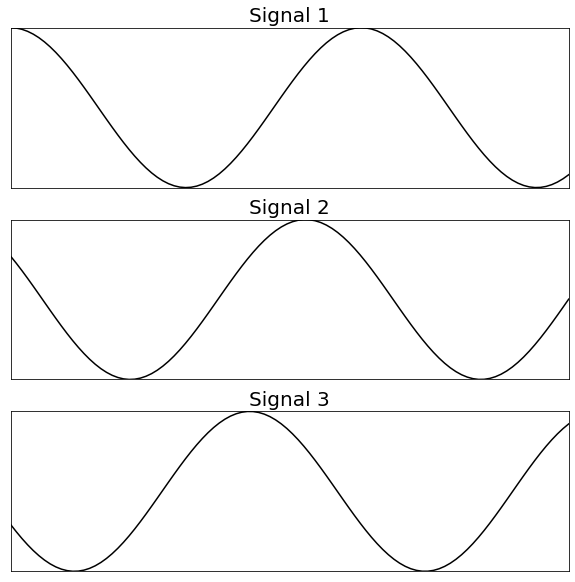

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 100)
y1, y2, y3 = np.cos(x), np.cos(x + 1), np.cos(x + 2)
names = ['Signal 1', 'Signal 2', 'Signal 3']

y=[y1,y2,y3] # put the curves in a list to iterate on it
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10,10)) # set 3 rows, 1 column, and a size for the figure

for i in range(3):    
    axes[i].set_title(names[i], size=20) # set the title and the font size for the title
    axes[i].plot(x, y[i], color="black") # plot the curve

    # To iterate over all items in a multidimensional numpy array, use the `flat` attribute
for ax in axes.flat:
    # Remove all xticks and yticks...
    ax.set(xticks=[], yticks=[]) # removes the horizontal and vertical tickmarks
    ax.set_xlim(0,10) # sets a smaller x range to remove the padding at both ends of the curves
    ax.set_ylim(-1,1) # sets a smaller y range to remove the padding above and below the curves
plt.show()

Exercise 2.1
--------------

Now let's try combining `bar` and `fill_between` to make a nice prediction of what will happen as this class progresses:

Can you reproduce the figure below?
<img src="images/exercise_2.1-bar_and_fill_between.png">

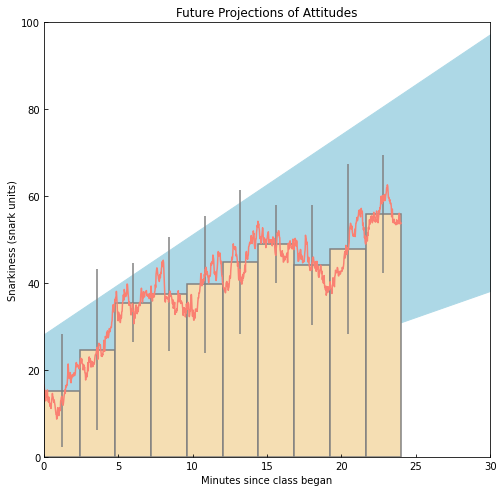

In [2]:
# %load exercises/2.1-bar_and_fill_between.py
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)

from matplotlib import rcParams
rcParams['xtick.direction'] = 'in'
rcParams['ytick.direction'] = 'in'
# print(rcParams.keys()) ## shows all available parameters to set

# Generate data...
y_raw = np.random.randn(1000).cumsum() + 15
x_raw = np.linspace(0, 24, y_raw.size)

# Get averages of every 100 samples...
x_pos = x_raw.reshape(-1, 100).min(axis=1)
y_avg = y_raw.reshape(-1, 100).mean(axis=1)
y_err = y_raw.reshape(-1, 100).ptp(axis=1)

bar_width = x_pos[1] - x_pos[0]

# Make a made up future prediction with a fake confidence
x_pred = np.linspace(0, 30)
y_max_pred = y_avg[0] + y_err[0] + 2.3 * x_pred
y_min_pred = y_avg[0] - y_err[0] + 1.2 * x_pred

# Just so you don't have to guess at the colors...
barcolor, linecolor, fillcolor = 'wheat', 'salmon', 'lightblue'

# Now you're on your own!
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,8)) 

axes.set_title("Future Projections of Attitudes")
axes.set_xlabel("Minutes since class began")
axes.set_ylabel("Snarkiness (snark units)")
fig.set_facecolor("white") # set background color inside fig and outside subplot 

axes.set_xlim(0,30) 
axes.set_ylim(0,100) 
axes.set(xticks=np.linspace(0, 30, 7), yticks=np.linspace(0, 100, 6)) 
 

axes.fill_between(x_pred, y_min_pred, y_max_pred, color=fillcolor)
axes.plot(x_raw, y_raw, color=linecolor)
axes.bar(x_pos+bar_width/2, y_avg, width=bar_width, yerr=y_err, color=barcolor, edgecolor='gray', ecolor='gray', linewidth=1.5)
plt.show()

Exercise 2.2
--------------

Can you reproduce the figure below?
<img src="images/exercise_2.2-vmin_vmax_imshow_and_colorbars.png">

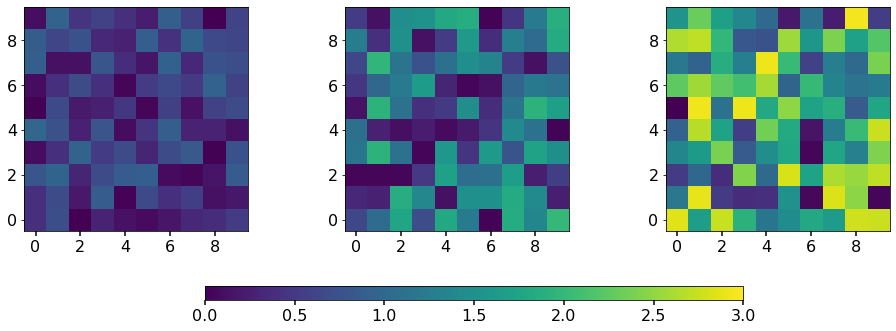

In [3]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)

from matplotlib import rcParams
rcParams['xtick.direction'] = 'out'
rcParams['ytick.direction'] = 'out'
rcParams['font.size'] = '16'
rcParams['xtick.major.width'] = '1.5'
rcParams['xtick.major.size'] = '5'
rcParams['xtick.major.top'] = 'False'
rcParams['ytick.major.right'] = 'False'
#print(rcParams.keys()) ## shows all available parameters to set

# Generate random data with different ranges...
data1 = np.random.random((10, 10))
data2 = 2 * np.random.random((10, 10))
data3 = 3 * np.random.random((10, 10))

# Set up our figure and axes...
fig, axes = plt.subplots(ncols=3, figsize=plt.figaspect(1/3.4))
fig.tight_layout() # Make the subplots fill up the figure a bit more...
cax = fig.add_axes([0.25, -0.1, 0.55, 0.05]) # Add an axes for the colorbar

# Now you're on your own!
fig.set_facecolor("white") # set background color inside fig and outside subplot
data=[data1, data2, data3]
im=[None,None,None]

cmap='YlGnBu_r'  # this is obviously wrong, but I could not figure out the desired colormap  
                 # the _r part at the end of the name reverses the order of the colors

for i in range(3):
    axes[i].set_xlim(-0.5,9.5) 
    axes[i].set_ylim(-0.5,9.5) 
    axes[i].set(xticks=[0,2,4,6,8], yticks=[0,2,4,6,8])
    im[i] = axes[i].imshow(data[i], interpolation='nearest', vmin=0, vmax=3)

fig.colorbar(im[0], cax=cax, orientation='horizontal', ticks=[0,0.5,1,1.5,2,2.5,3], ticklocation='bottom')

plt.show()

Part 2 
--------------

Read and run the examples in the examples folder.

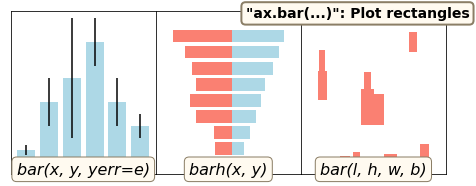

In [4]:
%run "examples/bar_example.py"

C:\Users\tteodorescu\OneDrive - Educational Testing Service\ETS\Data Science\Data Science Academy\Week4\Homework\examples\contour_example.py:8: MatplotlibDeprecationWarning: In a future release, get_sample_data will automatically load numpy arrays.  Set np_load to True to get the array and suppress this warning.  Set asfileobj to False to get the path to the data file and suppress this warning.
  z = np.load(get_sample_data('C:/Users/tteodorescu/OneDrive - Educational Testing Service/ETS/Data Science/Data Science Academy/Week4/Homework/examples/assets/bivariate_normal.npy'))


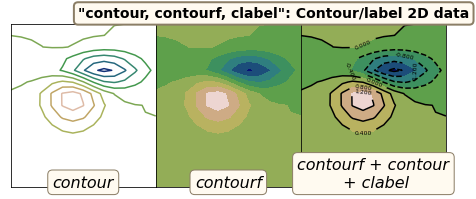

In [5]:
%run "examples/contour_example.py"

In [6]:
%run "examples/example_utils.py"

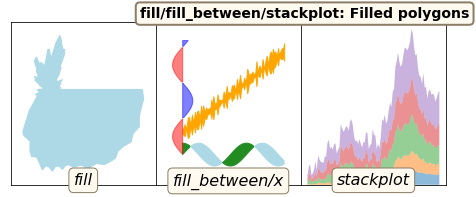

In [7]:
%run "examples/fill_example.py"

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\tteodorescu\\Anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\sample_data\\grace_hopper.png'

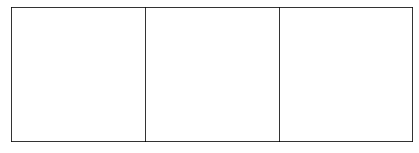

In [8]:
%run "examples/imshow_example.py"

C:\Users\tteodorescu\OneDrive - Educational Testing Service\ETS\Data Science\Data Science Academy\Week4\Homework\examples\pcolor_example.py:13: MatplotlibDeprecationWarning: In a future release, get_sample_data will automatically load numpy arrays.  Set np_load to True to get the array and suppress this warning.  Set asfileobj to False to get the path to the data file and suppress this warning.
  z = np.load(get_sample_data('C:/Users/tteodorescu/OneDrive - Educational Testing Service/ETS/Data Science/Data Science Academy/Week4/Homework/examples/assets/bivariate_normal.npy'))
C:\Users\tteodorescu\OneDrive - Educational Testing Service\ETS\Data Science\Data Science Academy\Week4\Homework\examples\pcolor_example.py:25: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will bec

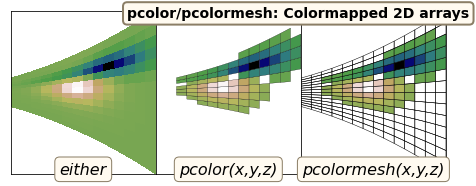

In [9]:
%run "examples/pcolor_example.py"

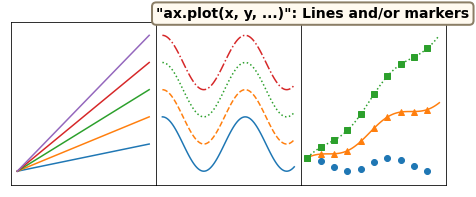

In [10]:
%run "examples/plot_example.py"

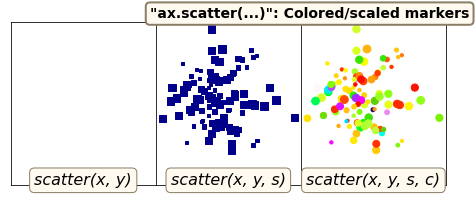

In [11]:
%run "examples/scatter_example.py"

AttributeError: 'AxesSubplot' object has no attribute 'set_color_cycle'

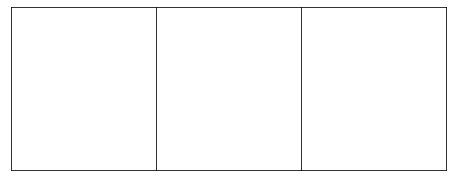

In [12]:
%run "examples/statistical_example.py" # line 40 seems to generate an error

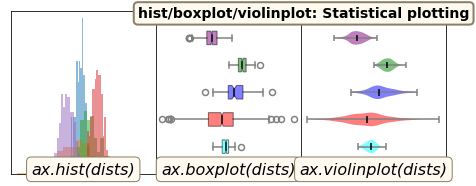

In [13]:
%run "examples/statistical_example_2.py" # I commented out line 40 to avoid the error

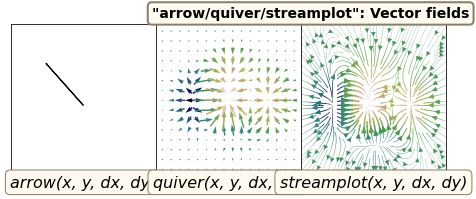

In [14]:
%run "examples/vector_example.py"

Part 3
--------------

Using the data in the data folder, create histogram, scatter plot, pie plot and others (if you like) using matplotlib, seaborn, plotly and ipywidgets

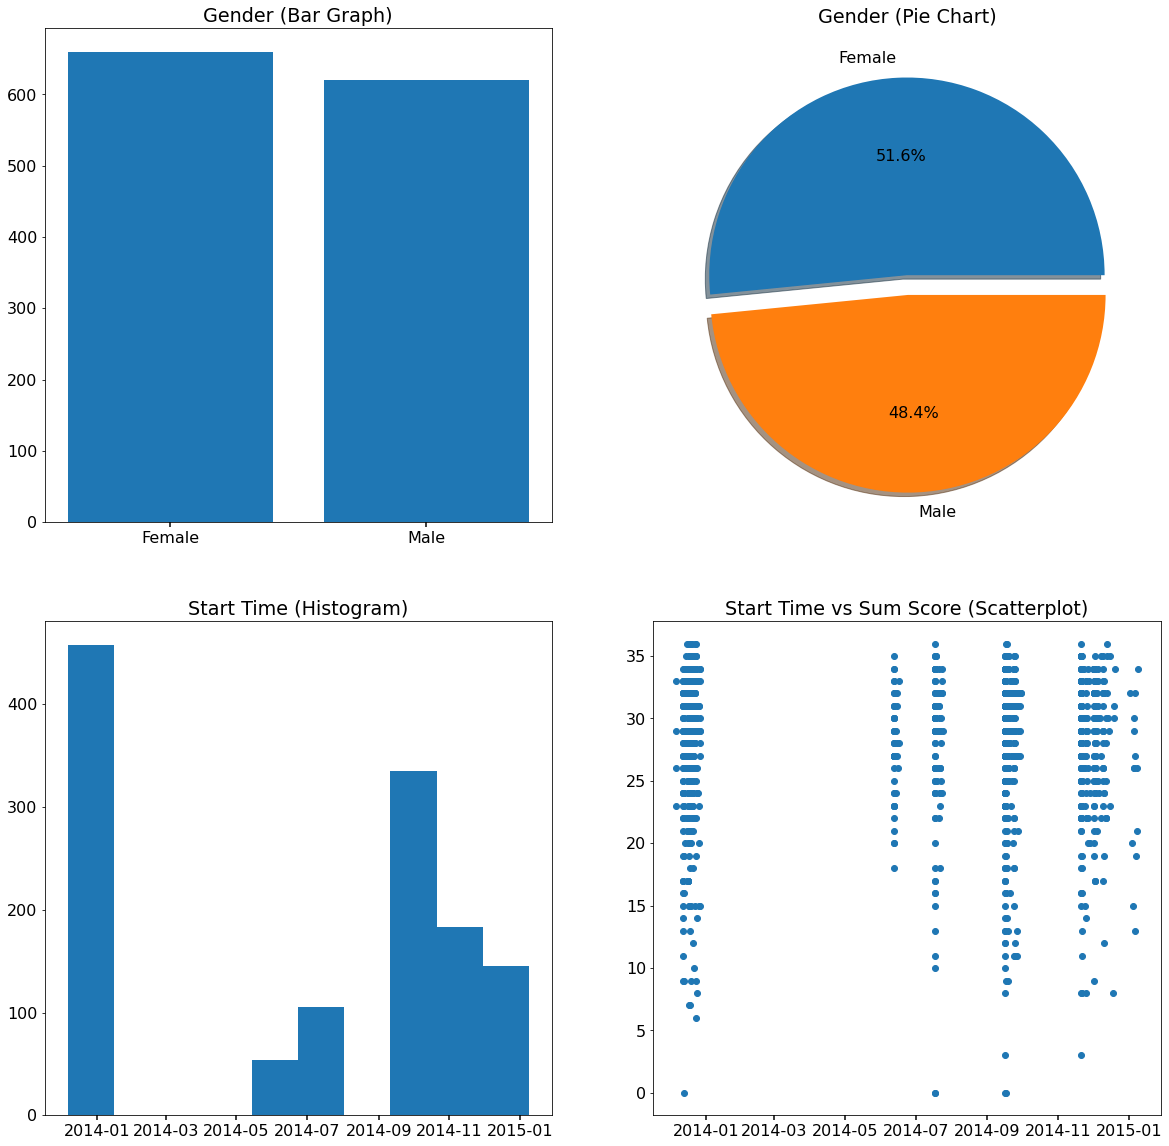

In [15]:
# Mathplotlib
import pandas as pd
from datetime import datetime
from datetime import timedelta
df = pd.read_csv('data for week4/science_response.csv')
df[['startTime']] = df[['startTime']].apply(pd.to_datetime)
df[['playerID', 'gender']] = df[['playerID', 'gender']].astype("string")

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,20))
gender_freq_df = df['gender'].value_counts().to_frame()
axes[0,0].bar(list(gender_freq_df.index.values), list(gender_freq_df['gender']))
axes[0,0].set_title("Gender (Bar Graph)")

axes[0,1].pie(list(gender_freq_df['gender']), labels=list(gender_freq_df.index.values), explode=(0,0.1), autopct='%1.1f%%', shadow=True)
axes[0,1].set_title("Gender (Pie Chart)")


axes[1,0].hist(df['startTime'])
axes[1,0].set_title("Start Time (Histogram)")

axes[1,1].scatter(df['startTime'], df['sum_score'])
axes[1,1].set_title("Start Time vs Sum Score (Scatterplot)")
plt.show()

Part 3 (seaborn)
--------------


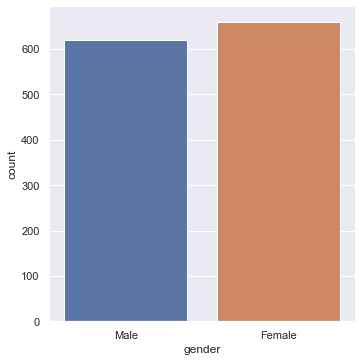

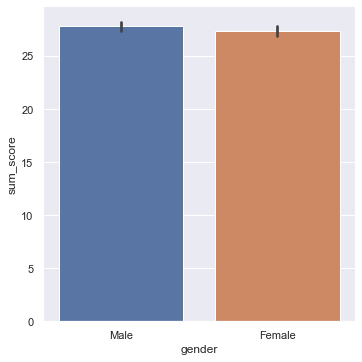

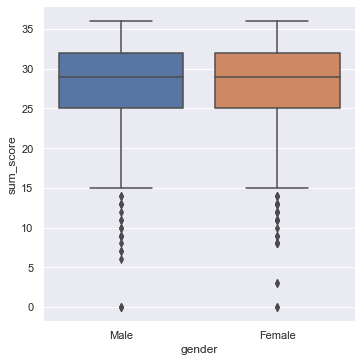

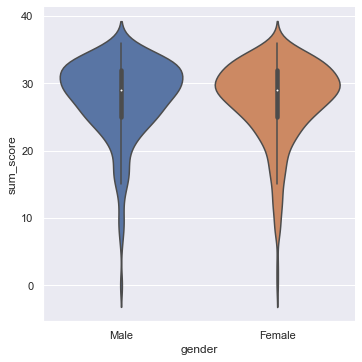

In [16]:
#seaborn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
df = pd.read_csv('data for week4/science_response.csv')
df[['startTime']] = df[['startTime']].apply(pd.to_datetime)
df[['playerID', 'gender']] = df[['playerID', 'gender']].astype("string")

#sns.catplot(x="startTime", y="sum_score", data=df);
gender_freq_df = df['gender'].value_counts().to_frame()
data = df[df['gender'].isin(list(gender_freq_df.index.values))]

sns.catplot(data=data, x="gender", kind="count")
sns.catplot(data=data, x="gender", y="sum_score", kind="bar")
sns.catplot(data=data, x="gender", y="sum_score", kind="box")
sns.catplot(data=data, x="gender", y="sum_score", kind="violin")

<AxesSubplot:xlabel='startTime', ylabel='Count'>

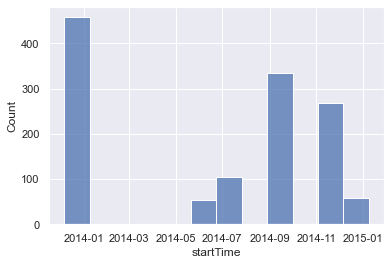

In [17]:
# also seaboarn
# moved line below to a separate cell because it created issues when it was at the end of the previous cell, not sure why
sns.histplot(df['startTime'])

Part 3 (plotly express)
--------------


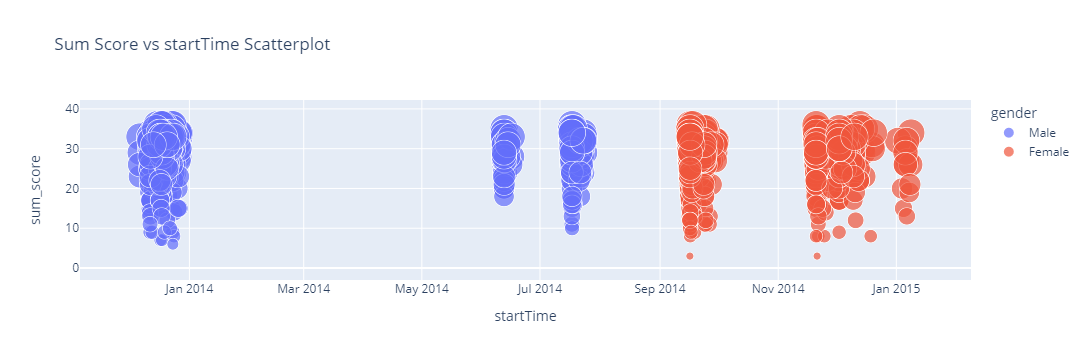

In [18]:
import plotly.express as px
import pandas as pd
df = pd.read_csv('data for week4/science_response.csv')
df[['startTime']] = df[['startTime']].apply(pd.to_datetime)
df[['playerID', 'gender']] = df[['playerID', 'gender']].astype("string")

#gender_freq_df = df['gender'].value_counts().to_frame()
#data = df[df['gender'].isin(list(gender_freq_df.index.values))]

px.scatter(df, x="startTime", y="sum_score", color="gender", size='sum_score', title='Sum Score vs startTime Scatterplot')

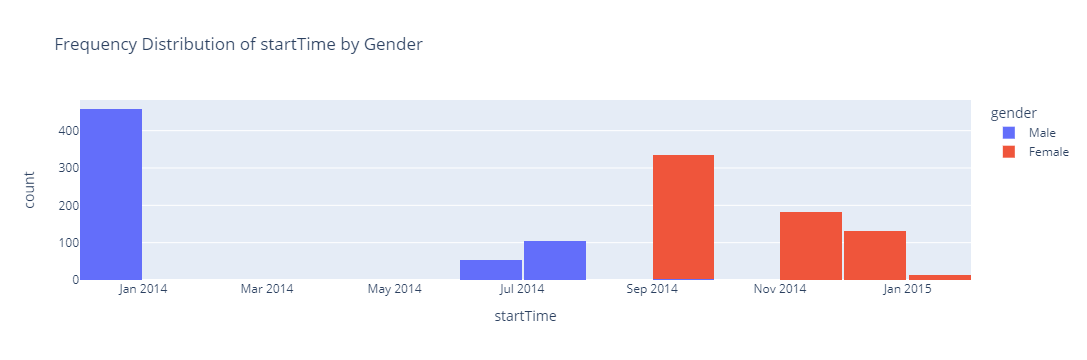

In [19]:
px.histogram(df,x='startTime',color='gender', title='Frequency Distribution of startTime by Gender')

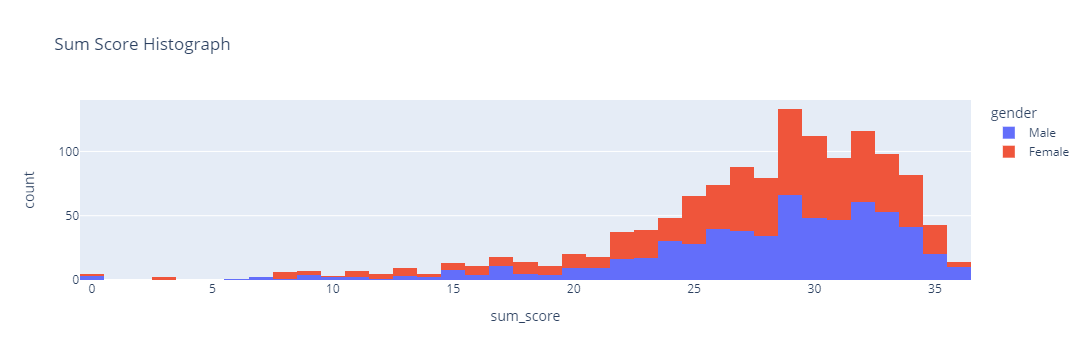

In [20]:
px.histogram(df,x='sum_score',color='gender', title='Sum Score Histograph')

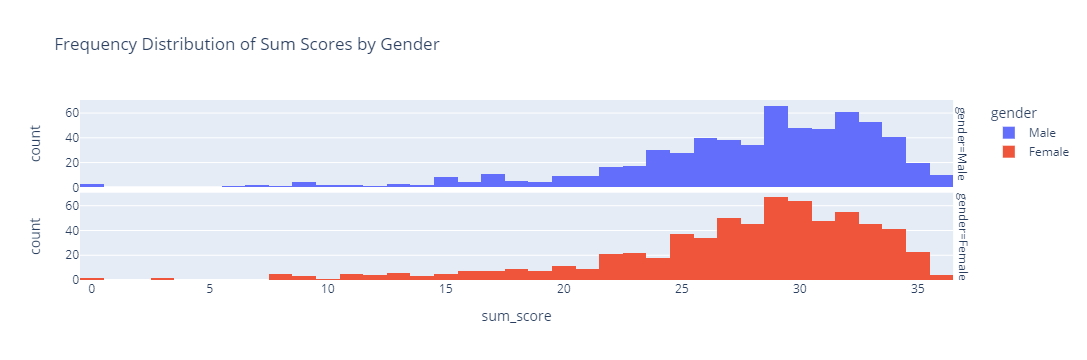

In [21]:
px.histogram(df,x='sum_score',color='gender', facet_row='gender', title='Frequency Distribution of Sum Scores by Gender')

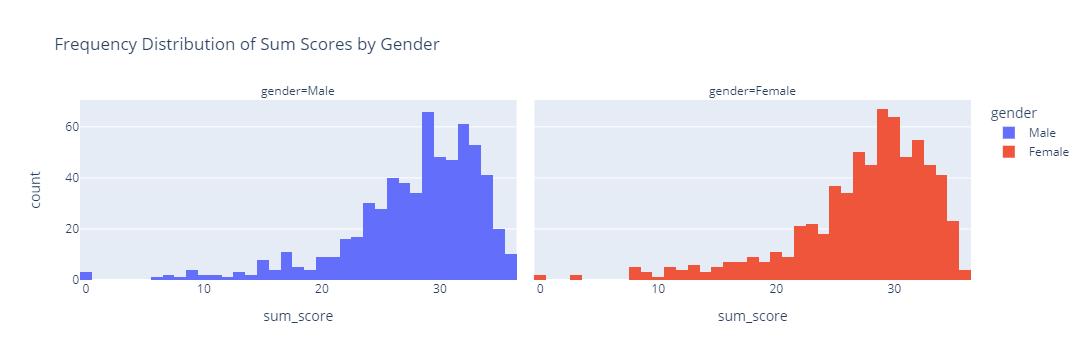

In [22]:
px.histogram(df, x='sum_score', color='gender', facet_col='gender', title='Frequency Distribution of Sum Scores by Gender')

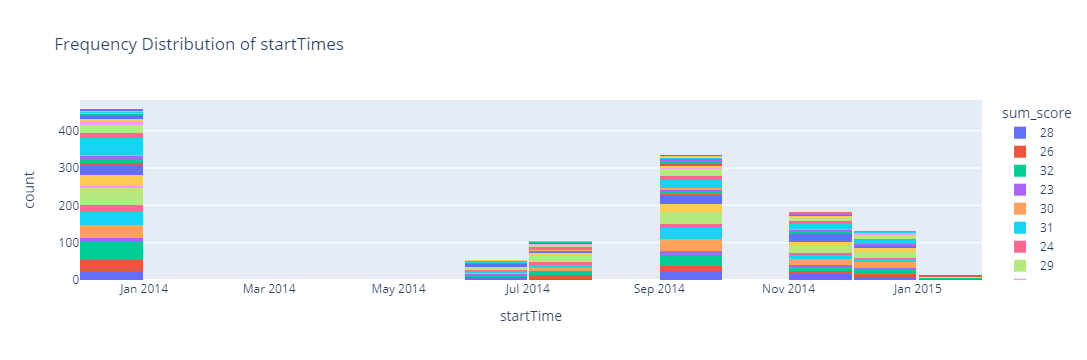

In [23]:
px.histogram(df,x='startTime',color='sum_score', title='Frequency Distribution of startTimes')

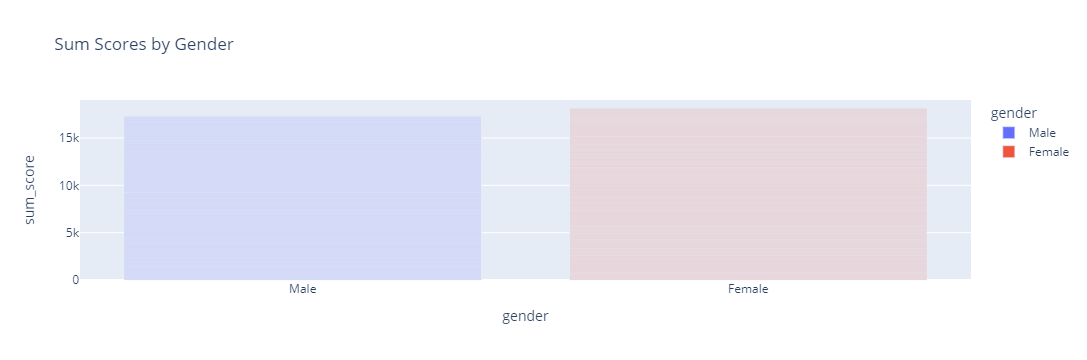

In [24]:
px.bar(df, x='gender', y='sum_score', color='gender', title= 'Sum Scores by Gender')

Part 3 (ipywidgets)
--------------


In [25]:
import numpy as np
import pandas as pd
import plotly.express as px
from ipywidgets import interact, fixed, widgets
from IPython.display import display

df = pd.read_csv('data for week4/science_response.csv')
df[['startTime']] = df[['startTime']].apply(pd.to_datetime)
df[['playerID', 'gender']] = df[['playerID', 'gender']].astype("string")


def gender_scatterplot(df, select_gender, select_item):
    return px.histogram(df.query('gender==@select_gender'), x='sum_score', color=select_item, title='Freq Distribution of Sum Scores for ' + select_gender + ' Respondants, Colored by Responses to '+ select_item)

item_list = ['item' + str(sub) for sub in list(range(1, 41))]
gender_list = df['gender'].unique()
result = interact(gender_scatterplot, df=fixed(df), select_gender=gender_list, select_item=item_list)

interactive(children=(Dropdown(description='select_gender', options=('Male', 'Female'), value='Male'), Dropdow…

In [26]:
import numpy as np
import pandas as pd
import plotly.express as px

df = pd.read_csv('data for week4/science_response.csv')
df[['startTime']] = df[['startTime']].apply(pd.to_datetime)
df[['playerID', 'gender']] = df[['playerID', 'gender']].astype("string")


def gender_scatterplot(df,conti):
    return px.histogram(df.query('gender==@conti'), x='sum_score', color='sum_score', title='Frequency Distribution of Sum Scores by Gender')

gender_list = df['gender'].unique()
result = interact(gender_scatterplot, df=fixed(df), conti=gender_list)

interactive(children=(Dropdown(description='conti', options=('Male', 'Female'), value='Male'), Output()), _dom…

Part 4 
--------------

Create one viola dashboard using the data in the data folder.

**I need help with Viola. I have it installed in Anaconda, but I don\'t have the "Render with Viola" button in Jupyter Lab.**

Part 5 
--------------

Create one streamlit dashboard using the data in the data folder.


**Open Anaconda Prompt, navigate to the homework folder, and then run `streamlit run streamlit_homework.py`**